# IAS 150

### Imports

In [1]:
import pandas as pd
import numpy as np
import migrant_functions as mf
import qgrid as qg
import matplotlib.pyplot as plt

In [2]:
migrant_data = pd.read_csv('migrants_semifinal.csv').drop(columns=['Unnamed: 0'])

In [3]:
migrant_data.head()

,Code,Country,Year,Migration Type,Total Migration,Gender,Country 1,Country 1 Count,Country 2,Country 2 Count,Country 3,Country 3 Count,Country 4,Country 4 Count,Country 5,Country 5 Count
0,192,Cuba,1990,Emigration,399117,female,United States of America,351002,Puerto Rico,9510,Spain,9264,Venezuela (Bolivarian Republic of),5874,Dominican Republic,3900
1,192,Cuba,1990,Emigration,436429,male,United States of America,385969,Spain,12590,Puerto Rico,10069,Venezuela (Bolivarian Republic of),5685,Dominican Republic,2924
2,192,Cuba,1990,Emigration,835546,total,United States of America,736971,Spain,21854,Puerto Rico,19579,Venezuela (Bolivarian Republic of),11559,Dominican Republic,6824
3,192,Cuba,1990,Immigration,17278,female,Spain,5394,Russian Federation,1728,Haiti,1478,United States of America,577,China,507
4,192,Cuba,1990,Immigration,17277,male,Spain,5309,Russian Federation,2763,Ukraine,907,United States of America,609,Haiti,585


In [29]:
# either a bar graph or line graph
    # if bar, x = year, y=variable
    # if line, y=country, x=year
def pick_and_graph(variable, variable_type, immigration_type, interest_country, plot_type):
    selected_data = migrant_data.loc[(migrant_data[variable] == variable_type)
                                     & (migrant_data['Migration Type'] == immigration_type),:]
    picks = selected_data[['Country', 'Year', 'Total Migration']]
    
    if plot_type == 'line':
    
        plt.style.use('seaborn-white')
        my_dpi=96
        plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

        region =['Cuba',
         'El Salvador',
         'Guatemala',
         'Honduras',
         'Mexico',
         'Venezuela (Bolivarian Republic of)']

        # multiple line plot
        country_list = list(np.unique(picks['Country']))
        end_values = []
        for country in country_list:
            country_picks = picks.loc[picks['Country'] == country,:]
            if country != interest_country:
                plt.plot(country_picks['Year'].values, np.log(country_picks['Total Migration'].values), marker='', color='black', linewidth=1, alpha=0.4)
            else:
                end_value = picks.loc[picks['Country'] == country,:].values[6][2]
                plt.plot(country_picks['Year'].values, np.log(country_picks['Total Migration'].values), marker='', color='blue', linewidth=5, alpha=0.7)

        plt.xlim(1989, 2018);
        plt.ylim(7, 20);

        def rand_jitter(arr):
            stdev = .01*(max(arr)-min(arr))
            return arr + np.random.randn(len(arr)) * stdev



        plt.text(2019, np.log(end_value), interest_country, horizontalalignment='left', size='small', color='black')

        plt.title('Female' + ' ' + 'immigration ' + "For Each Country, by Year", loc='left', fontsize=12, fontweight=0, color='black');
        plt.xlabel("Year");
        plt.ylabel("log(Immigration)");
        
    elif plot_type == 'bar':
        # libraries
        
        # set width of bar
        barWidth = 0.25

        # set height of bar
        bars1 = [12, 30, 1, 8, 22]
        bars2 = [28, 6, 16, 5, 10]
        bars3 = [29, 3, 24, 25, 17]

        # Set position of bar on X axis
        r1 = np.arange(len(bars1))
        r2 = [x + barWidth for x in r1]
        r3 = [x + barWidth for x in r2]

        # Make the plot
        plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
        plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
        plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')

        # Add xticks on the middle of the group bars
        plt.xlabel('group', fontweight='bold')
        plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])

        # Create legend & Show graphic
        plt.legend()
        plt.show()

    else:
        print('Not a valid visulization!')
        
        
    

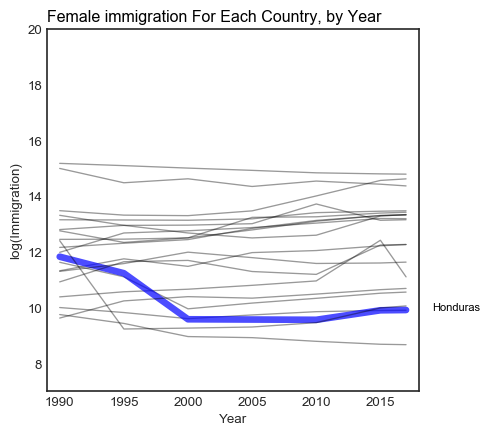

In [34]:
pick_and_graph('Gender', 'female', 'Immigration', 'Honduras', 'line')